<a href="https://colab.research.google.com/github/smvicky/assignment_1.3/blob/module2.3/PT_DS_Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pixeltests School Data Science Module
## Confidence Intervals

Objectives:

- Student can explain the purpose of confidence intervals and identify applications for their use
- Student can explain the implications of the central limit theorem in inferential statistics
- Student can demonstrate how to build a confidence interval around a sample estimate
- Student can report margin of error and visualize graphically a confidence interval to communicate the precision of sample estimates to a non-technical audience
- Student can explain the concepts of statistical estimate, precision, and standard error in regards to inferential statistics


#What are confidence intervals?  Why make them?

In the past two units, we've talked about two different hypothesis tests: the t-test for a population mean(s) and the chi-square test for the relationship between two categorical variables.

When we reject the null hypothesis for a one-independent-sample t-test, we say we believe that the population mean is *not* equal to some reference value (recall that the null hypothesis is that the population mean *is* equal to a reference value).  

However, rejecting the null hypothesis only gives us a clue to what we think the population mean *is not*.  


**The purpose of a confidence interval for a one-sample t-test is to allow us to estimate a population parameter (such as the population mean).**


Note that there are some analygous procedures for confidence intervals for chi-square tests and two-independent-sample t-tests, but we are going to focus on a confidence interval for a single population mean here.

#Informal Confidence Intervals in Daily Life

Believe it or not, you already use the concept of a confidence interval all the time in your daily life.


*   "How long will it take the brownies to bake?"  About 35 - 40 minutes.
*   "How many cookies should I bake for the bake sale?"  Probably around 2 - 3 dozen.
*   "How many loaves of bread will the bakery sell today?" Around 90 - 100.

The true answer to all of these questions is unknowable ahead of time.  Exactly how long it will take the brownies to bake probably depends on a zillion factors including how well your oven is working, how hot and humid it is, the age of the eggs you use, etc.

However, based on personal experience - and perhaps the recipe - we can be very confident that it will take between 35 - 40 minutes for the brownies to be done.  

Estimates in the other two scenarios work similarly.

# The Anatomy of a Confidence Interval

Here comes the math part!

When we make brownies, we make an informal confidence interval for how long it will take for them to bake based on the recipe and our baking knowledge.

**When we make a confidence interval for a population mean, we will use information from our sample (i.e., the mean) and mathematical properties of the t-distribution.**

##The formula for a confidence interval for a population mean is

###$\bar{X}$  $\pm$  $t^* \frac{s}{\sqrt{n}}$



Where $\bar{X}$ is the sample mean, s is the sample standard deviation and n is the sample size.

Note that $\frac{s}{\sqrt{n}}$ is the standard error, which is an estimate of the true standard deviation of the sample mean.  

**Another name for the quantitiy $t^* \frac{s}{\sqrt{n}}$ is the margin of error.**

Nearly all of the information we need to estimate the population mean using a confidence interval comes from our sample.  The only thing we don't get from the sample is t*.

Now is the time to introduce some data.

# Estimate the mean healthy adult human body temperature.

Everyone knows that 98.60 F (37.00 C) is the normal human body temperature.  But is that actually correct, and – come to think of it – how does everyone know that in the first place?

A German physician named Carl Reinhold August Wunderlich is generally credited with originating this idea, which was based on – reportedly – more than one million axiliary temperature readings taken from 25,000 subjects and was published in his 1868 book Das Verhalten der Eigenwärme in Krankheiten (which translates to The Behavior of the Self-Warmth in Diseases). But was he correct? History tells that his thermometer was a foot long and took 20 minutes to determine a subject’s temperature. For a measure that is used so often to determine general health, it would be a good idea to use modern instruments to confirm or refute his results.

In 1992, three physicians from the University of Maryland School of Medicine set out to do just that, measuring body temperatures for 223 healthy men and women aged 18-40 one to four times a day for three consecutive days using an electronic digital thermometer. The mean body temperature was computed for each individual, and this summary measure is recorded in the Bodytemp.csv dataset.

**We wish to estimate the population mean healthy human body temperature.**

Source: Mackowiak, P. A., Wasserman, S. S., and Levine, M. M.  (1992), "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich," Journal of the American Medical Association_, 268, 1578-1580.


In [ ]:
import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/pixeltests/datasets/main/BodyTemp.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(df.shape)
df.head()


(223, 2)


,ID,Body_temp
0,36,96.7
1,254,96.9
2,282,97.0
3,286,97.0
4,302,97.0


In [ ]:
subset = df.sample(n=20)
subset

,ID,Body_temp
174,173,98.6
220,231,99.4
183,279,98.6
95,166,98.1
62,45,97.9
199,77,98.9
103,81,98.1
51,227,97.8
152,276,98.4
110,250,98.1


In [ ]:



# The more accurate you want to be (the more likely you want
# to be able to capture the true population mean in your CI,
# the less precise your CI will be (the wider the range).

# plt.axvline(98.6, color='red')

The two variables in the dataset are participant ID and body temperature measured in degrees F.

We can use the mean, sd and row counting functions in Python to calculate and save the sample mean body temp ($\bar{X}$ for the CI formula), the sample standard deviation (s in the CI formula) and the sample size (n in the formula).

In [ ]:
df['Body_temp'].describe()

count    223.000000
mean      98.165022
std        0.527305
min       96.700000
25%       97.800000
50%       98.200000
75%       98.500000
max       99.600000
Name: Body_temp, dtype: float64

In [ ]:
#Calculate mean
mean_body_temp = df['Body_temp'].mean()
mean_body_temp

98.16502242152464

In [ ]:
#Calculate SD
sd_body_temp = df['Body_temp'].std()
sd_body_temp

0.5273047859946364

In [ ]:
#Calculate n
n_body_temp = len(df)
n_body_temp

223

We can calculate the standard error of the sample mean by dividing the sd of the sample by the square root of the sample size.

In [ ]:
#Calculate SE (Standard Error)
se_body_temp = sd_body_temp / np.sqrt(n_body_temp)
se_body_temp

0.035310940220425246

In [ ]:
se_body_temp = df['Body_temp'].sem()
print (se_body_temp)

0.035310940220425246


Let's plug these quantities into the CI formula.  We're almost there!

###$\bar{X}$  $\pm$  $t^* \frac{s}{\sqrt{n}}$


98.17 $\pm$ $t^* \frac{0.53}{\sqrt{223}}$

98.17 $\pm$ $t^* * 0.035$

So what is t*?????

Let's look carefully at what the CI equation is saying.

We are going to use our sample mean as the starting point for estimating the population mean.  That seems like a good idea.

Then we are going to add and subtract some number of standard errors from the sample mean to get the range of values that will be our confidence interval.

**t* is the number that tells us how many standard errors to add and subtract from the sample mean in the CI formula.**

How do we calculate t*?

#A Brief Digression Into the Central Limit Thoerem

The Central Limit Theorem (or CLT) tell us that, as long as the sample size is big enough (about 30-40), the distribution of the sample mean is Normal with a mean equal to the population mean and a standard deviation equal to $\frac{\sigma}{\sqrt{n}}$ .

How do we know this?  Take a graduate level statistics class to find out!  Just kidding, but only kind of.  It has to do with limit calculus and is beyond the scope of what we are doing right now.

Because we are actually estimating two population parameters (both the population mean and the population standard deviation) we need to amend the CLT statement above a tiny bit.

As long as the sample size is big enough (about 40), the distribution of the sample mean has a **t-distribution** with a mean equal to the population mean, a standard deviation equal to $\frac{s}{\sqrt{n}}$, and n-1 degrees of freedom.

Let's look at a picture:


![alt text](https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/T-dist%201.png)


In fact, **the CLT tells us to expect 95% of sample means to be within about 2 standard errors of the population mean.**

The reason that we say "about" 2 is that the exact number of standard errors we need to add and subtract to be 95% confident about the population mean will depend on our sample size in the form of the degrees of freedom (n - 1).  We will talk about DOF later.

The CLT allows us to be a little bit more specific about our confidence interval formula.

We can now say that:

"We are 95% confident that the true population mean falls between about 2SEs below the sample mean and about 2SEs above the sample mean."

**We have to use Python to get the exact value of t* for the CI formula.**

In [ ]:
from scipy.stats import t
#Don't worry too much about where the 0.975 comes from.  It has to do
#with wanting to determine the *middle* 95% of the t-distribution
#We're going to learn
#how to calculate a 95% CI this easy way in just a minute.

#Recall that n = 223 for the body temp problem.
df_body_temp = n_body_temp - 1
# t_star = t.ppf(0.99,df=df_body_temp)
t_star = t.ppf(0.99,df=223)
t_star

2.343185806508914

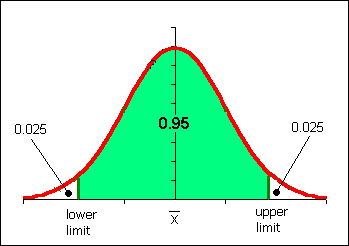

#Back to body temperature!

We left off in the body temperature example with:

A confidence interval of

98.17 $\pm$ $t^* * 0.035$

We know from the CLT that t* should be somewhere around 2 for a 95% confidence interval.

And further, using Python, we know that t* for a 95% confidence interval for the body temperature data = 1.97 (quick check - this is very close to 2).

98.17 $\pm$ 1.97 * 0.035

The margin of error = 1.97 * 0.035 = 0.07.



In [ ]:
#recall that we calculated mean_bodytem etc. above.

#Calculate the lower confidence limit

# Lower confidence limit

Lower_CL = mean_body_temp - (t_star * se_body_temp)
Lower_CL

98.08228232758566

In [ ]:
Lower_CL = mean_body_temp - (2 * se_body_temp)
Lower_CL

98.09440054108379

In [ ]:
#Calculate the upper confidence limit

Upper_CL = mean_body_temp + (t_star * se_body_temp)
Upper_CL

98.24776251546362

In conclusion, we are 95% confident that the population mean healthy human body temperature is between ?????????

#Want to see how to do this the easy way?

In [ ]:
#We can use the t.interval funtion to calculate the CI.
#We set the loc parameter equal to the mean and the
#scale parameter equal to the SE
#Alpha = 0.95 means we want a 95% CI

#Calculate your t-interval here.
t.interval(alpha = 0.95, df=df_body_temp, loc=mean_body_temp, scale=se_body_temp)

(98.09543489049658, 98.2346099525527)

Note that we get exactly the same answer as we got working by hand.

#But I want to be X% confident!

Because the confidence level is determined by t* and that's just a number, you can use any confidence level you want.  However, most commonly, we choose to be 90%, 95% or 99% confident.

We can tune the confidence level by changing the alpha parameter in the CI funtion.

In [ ]:
#90% Confidence Interval

t.interval(alpha = 0.90, df=df_body_temp, loc=mean_body_temp, scale=se_body_temp)

(98.106697704594, 98.22334713845528)

Sample size n= 10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


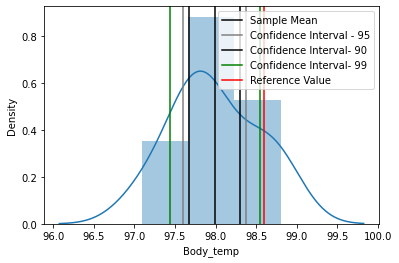

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resample data with smaller sample size
subset = df.sample(n=10)

# Calculate sample / population estimate
sample_mean = subset['Body_temp'].mean() # Sample Mean
sample_sem = subset['Body_temp'].sem() # Standard Error of the Mean
sample_df = len(subset['Body_temp']) - 1 # Degrees of Freedom
ci = 0.95  # Confidence Interval
Lower_CI, Upper_CI = t.interval(alpha = ci, df=sample_df, loc=sample_mean, scale=sample_sem)

ci = 0.90  # Confidence Interval
Lower_CI_90, Upper_CI_90 = t.interval(alpha = ci, df=sample_df, loc=sample_mean, scale=sample_sem)

ci = 0.99  # Confidence Interval
Lower_CI_99, Upper_CI_99 = t.interval(alpha = ci, df=sample_df, loc=sample_mean, scale=sample_sem)

# Plot the sample statistics
print ('Sample size n=', len(subset))
sns.distplot(subset['Body_temp'])

plt.axvline(sample_mean, color='black', label='Sample Mean')
plt.axvline(Upper_CI, color='gray', label='Confidence Interval - 95') # Upper Bound of our 95% Confidence Interval
plt.axvline(Lower_CI, color='gray'); # Lower Bound of our 95% Confidence Interval
plt.axvline(Upper_CI_90, color='black', label='Confidence Interval- 90') # Upper Bound of our 90% Confidence Interval
plt.axvline(Lower_CI_90, color='black'); # Lower Bound of our 90% Confidence Interval
plt.axvline(Upper_CI_99, color='green', label='Confidence Interval- 99') # Upper Bound of our 99% Confidence Interval
plt.axvline(Lower_CI_99, color='green'); # Lower Bound of our 99% Confidence Interval

# 90th CI: p < 0.10 is statistically significant (reject our Ho)
# 95th CI: p < 0.05 is statistically significant (reject our Ho)
# 99th CI: p < 0.01 is statistically significant (reject our Ho)
#    With the 99% CI, there is a lower change of a false positive; it
#    will be more difficult to capture the reference value between the
#    upper and lower CI.

plt.axvline(98.6, color='red', label='Reference Value')
plt.legend();

In [ ]:
#95% Confidence Interval
t.interval(alpha = 0.95, df=df_body_temp, loc=mean_body_temp, scale=se_body_temp)

(98.09543489049658, 98.2346099525527)

In [ ]:
#99% Confidence Interval
t.interval(alpha = 0.99, df=df_body_temp, loc=mean_body_temp, scale=se_body_temp)

(98.0732790800297, 98.25676576301957)

#But I want to be 100% confident!

Let's take a very, very close look at the confidence intervals above.  This is subtle - out in the 100ths place of the decimals.

The 90% confidence interval is the *narrowest* - it includes the smallest range of values - and the 99% confidence interval is the *widest* - it includes the widest range of values.

Confidence intervals are a trade-off between accuracy and precision.

**The more accurate you want to be, the less precise your CI will be.**

**The less accurate you are willing to be, the more precise your estimate can be.**

At the point we were 100% confident, our CI would probably be meaningless.

### In terms of brownies:

*   We are 90% confident the brownies will be done in 35 - 36 minutes.
*   We are 95% confident the brownies will be done in 34 - 37 minutes.
*   We are 99% confident the brownies will be done in 33 - 39 minutes.
*   We are 100% confident the brownies will be done in 0 - 60 minutes.

The 100% confidence interval is true... but not very helpful.


#Common Errors with the Interpretation of Confidence Intervals.

**Correct statement:** We are 95% confident that the population mean healthy human body temperature is between 98.10 and 98.23 degrees F.

**Incorrect statement:** We are 95% confident that the sample mean healthy human body temperature is between 98.10 and 98.23 degrees F.

*  We want to make statements about the population mean, not the sample mean.

**Incorrect statement:** We are 95% confident that the sample mean healthy human body temperature is 98.17 degrees F.

*  This statement is incorrect because we aren't providing a range of values.

**Incorrect statement:** 95% of samples will have a mean that is between 98.10 and 98.23 degrees F.

*   95% of samples will have a mean that contains the true population mean.

## It can help to look at a picture

We expect 95% of all 95% CIs to contain the true population mean.  

That means, if we took 20 random samples from the same population, they'd all be different, but we'd expect 19/20 to contain the true population mean and only 1/20 not to contain the true population mean.

![alt text](https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/CI%20image.png)


# Degrees of freedom

*Degrees of freedom are a way of capturing uncertainty in a model

* They work a bit differently in t-tests (n - 1) vs. chi-square tests (rows - 1)*(col - 1) and will work a little differently when we get to regression next week.

* [Here's a great tutorial on degrees of freedom](https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics).

#The correspondence between confidence intervals and hypothesis tests.

If you believe that a C% confidence interval contains the true population mean, and the mean under the null hypothesis does not appear in the confidence interval, you can reject Ho at the alpha (1 - .C) level.

Note: This only works for two-sided confidence intervals paired with two-sided hypothesis tests (the only kind we are discussing in class).

We are 95% confident that the population mean healthy human body temperature is between 98.10 and 98.23 degrees F.

Therefore, we can conclude that we would reject the null hypothesis that the mean healthy human body temperature is 98.6 degrees F at the alpha = 0.05 level.


#Confidence intervals and sample size

If we increased the sample size from 223 to 500 but the sample mean and SD remained the same, describe two ways the margin of error would change. Would the margin of error become smaller or larger?

In [ ]:
from scipy.stats import t

#Don't worry too much about where the 0.975 comes from.  It has to do
#with wanting to determine the *middle* 95% of the t-distribution
#We're going to learn
#how to calculate a 95% CI this easy way in just a minute.
t_star = t.ppf(0.975,df=500)

n_body_temp = 500
se_body_temp = sd_body_temp/(n_body_temp**(1/2))

mean_body_temp + (t_star * se_body_temp)

ME = t_star*se_body_temp
print('ME =',ME)

ME = 0.046331604578207945


The margin of error becomes smaller.  You get a more precise estimate with the same level of confidence.

## Let's do one more quick example.

Use the Titanic dataset to create a 95% confidence interval for the population mean age of all Western Europeans traveling the US in the early 1900s (assume the Titanic passengers are representative of this population).

In [ ]:
import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/pixeltests/datasets/main/titanic.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(df.shape)
df.head()

(887, 8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


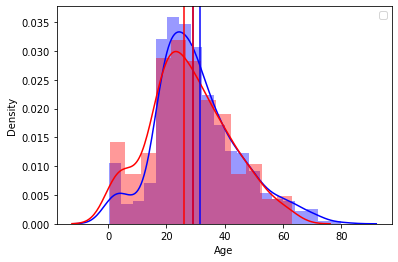

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resample data with smaller sample size

ci = 0.95  # Confidence Interval

m = df[df.Sex == 'male']
f = df[df.Sex == 'female']
sns.distplot(m['Age'], color='blue')
sns.distplot(f['Age'], color='red')

# Calculate sample / population estimate for males on the titanic
m_mean = m['Age'].mean() # Sample Mean
m_sem = m['Age'].sem() # Standard Error of the Mean
m_df = len(m['Age']) - 1 # Degrees of Freedom
m_LCI, m_UCI = t.interval(alpha = ci, df=m_df, loc=m_mean, scale=m_sem)

# Calculate sample / population estimate for males on the titanic
f_mean = f['Age'].mean() # Sample Mean
f_sem = f['Age'].sem() # Standard Error of the Mean
f_df = len(f['Age']) - 1 # Degrees of Freedom
f_LCI, f_UCI = t.interval(alpha = ci, df=f_df, loc=f_mean, scale=f_sem)

# Plot the sample statistics
plt.axvline(m_LCI, color='blue')
plt.axvline(m_UCI, color='blue')

plt.axvline(f_LCI, color='red')
plt.axvline(f_UCI, color='red')

plt.legend();

In [ ]:
# Performed a two-sample t-test on whether
# There is a difference in age of men and women on the Titanic.

from scipy.stats import ttest_ind

tstat, pval = ttest_ind(m['Age'], f['Age'], equal_var=True)
significance_threshold = 1 - ci # confidendence level (alpha)
if pval < 1 - ci:
  print ('This is statistically significant. We reject the null hypothesis.')
  print (pval, '<', significance_threshold)
else:
  print ('This is not statistically significant. We fail to reject the null hypothesis.')
  print (pval, '>', significance_threshold)


This is statistically significant. We reject the null hypothesis.
0.006177429581824169 < 0.050000000000000044


CI interval interpretation here.

#Bonus: Statistical Power and Error

95% confidence... 0.05 significance level... this is making me think there's a chance we could make the wrong decision with our hypothesis test...


###Yep.

There are four things that can happen when we conduct a hypothesis test:


|          |                   |     Truth    |              |   |
|:--------:|:-----------------:|:------------:|--------------|---|
|          |                   |  Ho is true  |  Ha is true  |   |
| Decision |     Reject Ho     | Type I error | Correct :)   |   |
|          | Fail to reject Ho |  Correct :)  | Type II error|   |


Smoke detector does not go off: accepting our null hypothesis (there IS an effect, but our statistical test does not detect it). Type II error.

If we better buy a better smoke detector, which is less likely to inappropriately accept the null hypothesis has MORE statistical power.

A type I error occurs when you reject the null hypothesis but it is really true.  The chance of making a type 1 error = significance level (threshold below which a p value is considered significant)

Sample mean = 98.17 (has an outlier that makes the mean much smaller than it should be)
Reference value = 98.6

We reject the null hypothesis, but in fact the null hypothesis is true. Type I error.

A type II error occurs when you fail to reject the null hypothesis when the alternative hypothesis is really true.  This is hard to calculate because it relies on a lot of assumptions about what's really going on if the alternative hypothesis is really true.

Sample mean = 98.5 (based upon random sample of 5, we draw many values close to the reference value)

Reference value = 98.6

We accept the null hypothesis, when we should in fact accept the alternative hypothesis. Type II error: false negative. This means we have low statistical power.

When we suspect we are making a type 2 error, we say we are ____________ to


reject the null hypothesis.

Statistical power is the ability to reject the null hypothesis when it is false. (The ability to detect a statistically significant difference when in truth there is an actual difference).

If you have a p > 0.05:
* There was no statistically significant difference.
* There may be a difference, but this study was not powered sufficiently to detect the difference; in other words, there was a low sample size.


There are several factors that influence statistical power:

1. Sample size.  Larger sample size = more statistical power
2. Alpha level.  Larger alpha (higher threshold) level = more statistical power
3. Effect size.  Larger the effect size = more statistical power

#Bonus: P-hacking

aka - the problem of of multiple comparisons

P-hacking is the practice of doing a bunch of hypothesis tests or creating a bunch of confidence intervals until you find one that is statistically significant.

The problem is that - just by chance - we expect to reject the null hypothesis incorrectly about 5% of the time.  

eg: If you do 100 hypothesis tests, you can expect 5 to be statistically significant just by chance.

Always lay out your hypotheses before you start working with your data and - if you want to make multiple comparisons - make sure to adjust for that with your significance level.

[Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction)

Whew!